In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

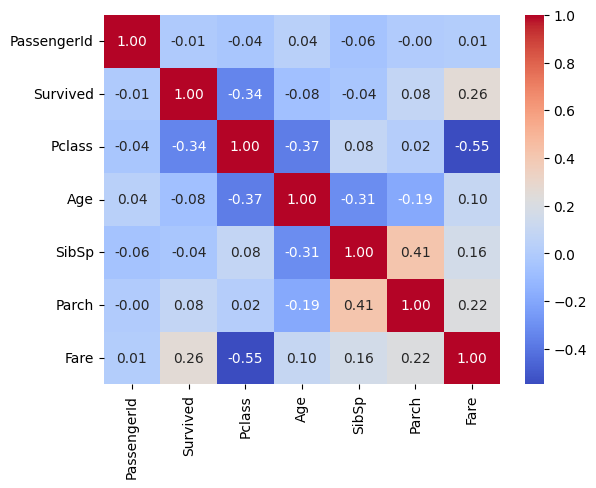

In [5]:
train_numeric_cols = train.select_dtypes(include=['number'])
corr_matrix = train_numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
missing_values_per_column = train.isna().sum()
print(missing_values_per_column)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Data preprocessing

In [9]:
# Dropping irrelevant columns like ticket and name
train.drop(columns=['Name', 'Ticket'], inplace=True)

# Converting catogerical variables to numbers 
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
train = pd.get_dummies(train, columns=["Embarked"], drop_first=True)

train["Cabin"] = train["Cabin"].fillna("Unknown").astype(str).str[0]
train = pd.get_dummies(train, columns=["Cabin"], drop_first=True)

train['Age'].fillna(train['Age'].mean(), inplace=True)

train.dtypes

C:\Users\dawid\AppData\Local\Temp\ipykernel_17016\683778048.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
C:\Users\dawid\AppData\Local\Temp\ipykernel_17016\683778048.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
Cabin_B           bool
Cabin_C           bool
Cabin_D           bool
Cabin_E           bool
Cabin_F           bool
Cabin_G           bool
Cabin_T           bool
Cabin_U           bool
dtype: object

In [10]:
train_original = train
train = train.select_dtypes(include=[np.number])
train.drop(columns=['PassengerId'], inplace=True) # inplace=True makes modifies the train df without copying it and returning a new one

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Survived'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Sex'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare')])

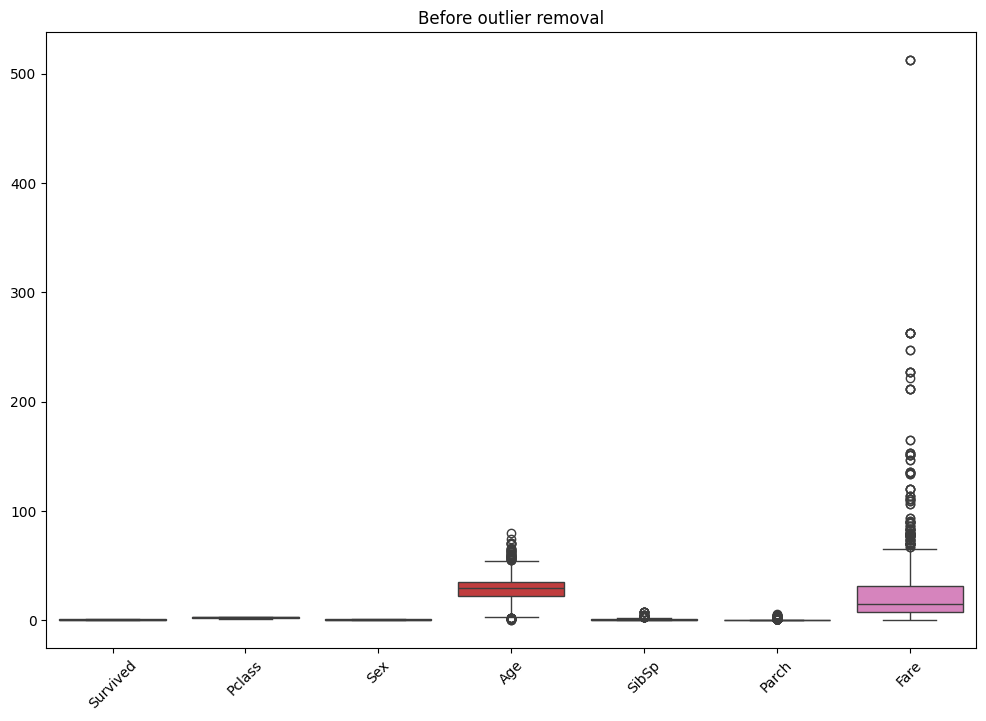

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train)
plt.title("Before outlier removal")
plt.xticks(rotation=45)

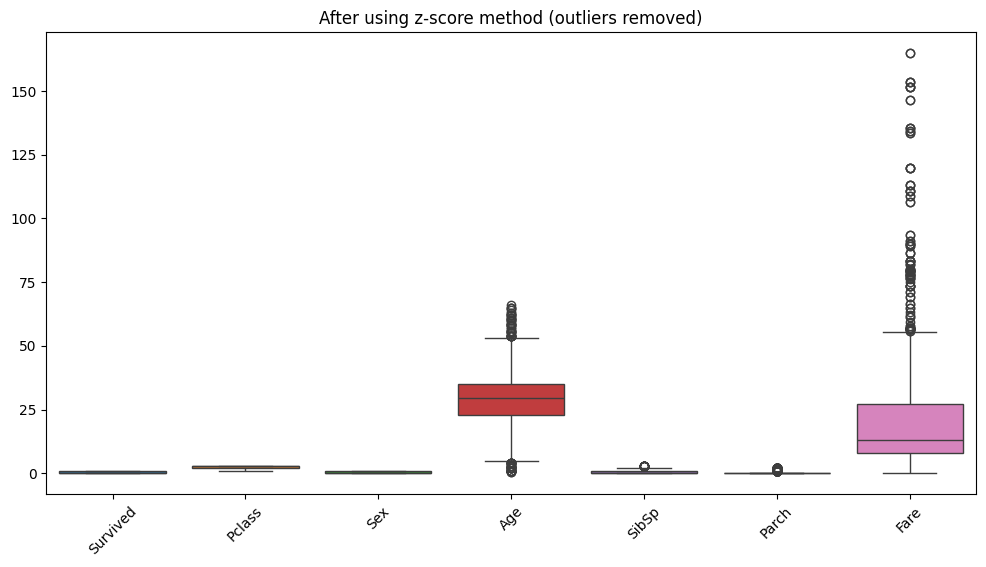

In [12]:
# Outlier removal using z-score method
from scipy import stats

z_scores = np.abs(stats.zscore(train.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)  

train_zscore = train[~outliers.any(axis=1)]  

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_zscore)
plt.title("After using z-score method (outliers removed)")
plt.xticks(rotation=45)
plt.show()

After removal: 
577


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Survived'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Sex'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare')])

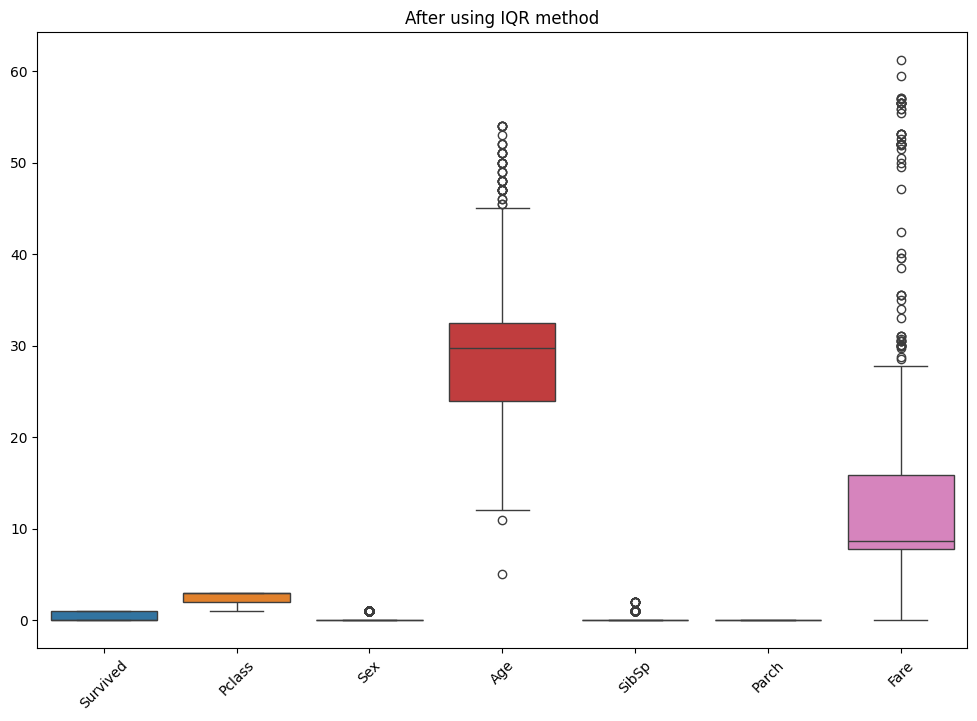

In [13]:
# Determining outliers using IQR method
numeric_train = train.select_dtypes(include=['number'])

Q1 = numeric_train.quantile(0.25)
Q3 = numeric_train.quantile(0.75)
IQR = Q3 - Q1

train_iqr = train[~((numeric_train < (Q1 - 1.5 * IQR)) | (numeric_train > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After removal: ")
print(train_iqr.shape[0])

plt.figure(figsize=(12, 8))
sns.boxplot(data=train_iqr)
plt.title("After using IQR method")
plt.xticks(rotation=45)

In [14]:
train = train_original
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,0,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False,False,True,False,False,False,False,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True,False,False,False,False,False,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True,False,True,False,False,False,False,False,False
4,5,0,3,0,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,False,True


Logistic regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = train[['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'SibSp']]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7989
Confusion Matrix:
[[90 15]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Decision tree

Accuracy: 0.80


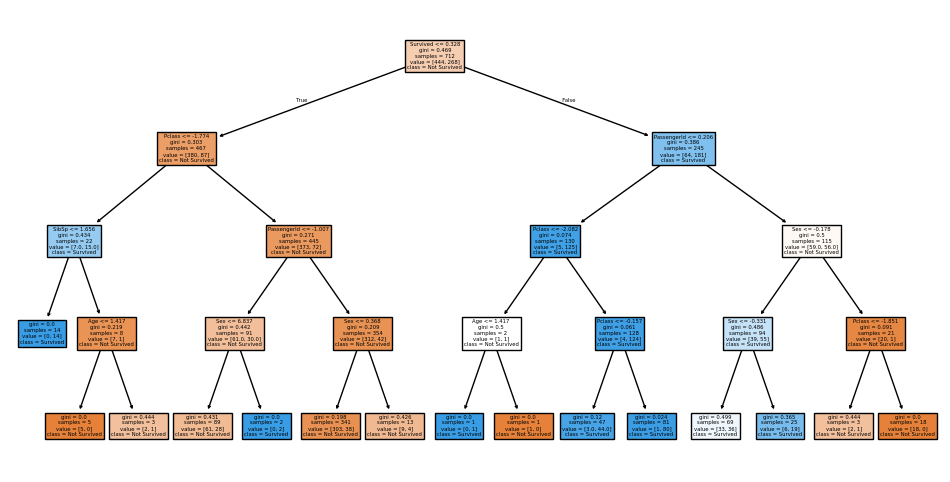

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=list(train.columns[:-1]), class_names=["Not Survived", "Survived"], filled=True)
plt.show()

Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


SVM - Support Vector Machines

In [19]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf') # Choosing the kernel function
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


Naive Bayes

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.770949720670391

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

